In [48]:
%matplotlib inline

import os
import scipy
import pandas as pd
import matplotlib
import itertools
import collections
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

In [233]:
WORKDIR="/Volumes/WorkDrive/2x2-5e7/"
DPP_SORT_PRIOR = WORKDIR + "dpp_sort/dirichlet-sort.prior"
DPP_USORT_PRIOR = WORKDIR + "dpp_usort/dirichlet-usort.prior"
UNIF_SORT_PRIOR = "/Volumes/Macintosh_HD_2/isaac/msbayes/18wasps-5e7-2x2/uniform-sort.prior"
UNIF_USORT_PRIOR = "/Volumes/Macintosh_HD_2/isaac/msbayes/18wasps-5e7-2x2/uniform-usort.prior"

#SUMSTATS <- c(42:95,114:131)
#PSI_INDEX <- 2
#OMEGA_INDEX <- 5
# pi: 42-59
# Watterson: 60-77
# pi.net: 78-95
# Tajima's D denominator: 114-131

pib = (41,58)
wat = (59,76)
pinet = (77,94)
tajd = (113,130)

## Plots non-overlapping on different subplots
def plot_euclid(SORTPRIOR_file, USORTPRIOR_file,  psi, start_index, end_index, nrows):
    plt.subplot(211)
    
    df = pd.read_table(SORTPRIOR_file, nrows=nrows)
    data = df.as_matrix()
    d8 = data[np.where(data[:,1] == psi)[0]]
    mean8 = np.mean(d8, axis=0)
    tot = 0
    sldist = []
    for i, _ in enumerate(d8):
        val = distance.euclidean(d8[i][start_index:end_index], mean8[start_index:end_index])
        sldist.append(val)
    print("Sorted: \tMean {0:.4f}\tStdv {1:.4f}".format(np.mean(sldist), np.std(sldist)))
    plt.xlim(xmin=0, xmax=0.22)
    plt.hist(sldist)

    plt.subplot(212)
    df = pd.read_table(USORTPRIOR_file, nrows=nrows)
    data = df.as_matrix()
    d8 = data[np.where(data[:,1] == psi)[0]]
    mean8 = np.mean(d8, axis=0)
    tot = 0
    usldist = []
    for i, _ in enumerate(d8):
        val = distance.euclidean(d8[i][start_index:end_index], mean8[start_index:end_index])
        usldist.append(val)
    print("Unsorted:\tMean {0:.4f}\tStdv {1:.4f}".format(np.mean(usldist), np.std(usldist)))
    plt.xlim(xmin=0, xmax=0.22)
    plt.hist(usldist)

    plt.suptitle("Psi="+str(psi))


In [243]:
#plot sorted and unsorted overlapping w/ alpha
def plot_euclid_overlapping(ax, SORTPRIOR_file, USORTPRIOR_file,  psi, start_index, end_index, nrows):
#    plt.figure()
    
    df = pd.read_table(SORTPRIOR_file, nrows=nrows)
    data = df.as_matrix()
    d8 = data[np.where(data[:,1] == psi)[0]]
    mean8 = np.mean(d8, axis=0)
    tot = 0
    sldist = []
    for i, _ in enumerate(d8):
        val = distance.euclidean(d8[i][start_index:end_index], mean8[start_index:end_index])
        sldist.append(val)
    print("Sorted: \tMean {0:.4f}\tStdv {1:.4f}".format(np.mean(sldist), np.std(sldist)))
    #ax.xlim(xmin=0, xmax=0.22)
    ax.hist(sldist, alpha=0.5)

    df = pd.read_table(USORTPRIOR_file, nrows=nrows)
    data = df.as_matrix()
    d8 = data[np.where(data[:,1] == psi)[0]]
    mean8 = np.mean(d8, axis=0)
    tot = 0
    usldist = []
    for i, _ in enumerate(d8):
        val = distance.euclidean(d8[i][start_index:end_index], mean8[start_index:end_index])
        usldist.append(val)
    print("Unsorted:\tMean {0:.4f}\tStdv {1:.4f}".format(np.mean(usldist), np.std(usldist)))
    #ax.xlim(xmin=0, xmax=0.22)
    ax.hist(usldist, alpha=0.5)

    ax.set_title("Psi="+str(psi))


In [252]:
#plot sorted and unsorted overlapping w/ alpha
def plot_euclid_overlapping_offDiag(ax, SORTPRIOR_file, USORTPRIOR_file,  psi1, psi2, start_index, end_index, nrows):
#    plt.figure()
    
    # Get the mean for psi2
    df = pd.read_table(SORTPRIOR_file, nrows=nrows)
    data = df.as_matrix()

    mean8 = np.mean(data[np.where(data[:,1] == psi2)[0]], axis=0)

    # Select all the psi values for psi1
    d8 = data[np.where(data[:,1] == psi1)[0]]
    tot = 0
    sldist = []
    for i, _ in enumerate(d8):
        val = distance.euclidean(d8[i][start_index:end_index], mean8[start_index:end_index])
        sldist.append(val)
    print("Sorted: \tMean {0:.4f}\tStdv {1:.4f}".format(np.mean(sldist), np.std(sldist)))
    #ax.xlim(xmin=0, xmax=0.22)
    ax.hist(sldist, alpha=0.5)

    df = pd.read_table(USORTPRIOR_file, nrows=nrows)
    data = df.as_matrix()
    mean8 = np.mean(data[np.where(data[:,1] == psi2)[0]], axis=0)
    
    d8 = data[np.where(data[:,1] == psi1)[0]]
    tot = 0
    usldist = []
    for i, _ in enumerate(d8):
        val = distance.euclidean(d8[i][start_index:end_index], mean8[start_index:end_index])
        usldist.append(val)
    print("Unsorted:\tMean {0:.4f}\tStdv {1:.4f}".format(np.mean(usldist), np.std(usldist)))
    #ax.xlim(xmin=0, xmax=0.22)
    ax.hist(usldist, alpha=0.5)

    ax.set_title("Psi="+str(psi2))


Sorted: 	Mean 0.0540	Stdv 0.0220
Unsorted:	Mean 0.0627	Stdv 0.0204
Sorted: 	Mean 0.0368	Stdv 0.0101
Unsorted:	Mean 0.0651	Stdv 0.0139
Sorted: 	Mean 0.0326	Stdv 0.0077
Unsorted:	Mean 0.0650	Stdv 0.0117
Sorted: 	Mean 0.0594	Stdv 0.0205
Unsorted:	Mean 0.0628	Stdv 0.0204
Sorted: 	Mean 0.0609	Stdv 0.0201
Unsorted:	Mean 0.0629	Stdv 0.0204
Sorted: 	Mean 0.0434	Stdv 0.0109
Unsorted:	Mean 0.0651	Stdv 0.0138
Sorted: 	Mean 0.0369	Stdv 0.0101
Unsorted:	Mean 0.0652	Stdv 0.0138
Sorted: 	Mean 0.0419	Stdv 0.0091
Unsorted:	Mean 0.0651	Stdv 0.0118
Sorted: 	Mean 0.0327	Stdv 0.0078
Unsorted:	Mean 0.0652	Stdv 0.0119


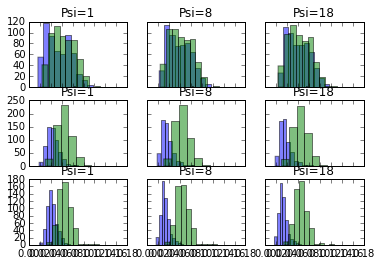

In [254]:
#plot_euclid(UNIF_SORT_PRIOR, UNIF_USORT_PRIOR, 3, pib[0], pib[1], 10000)
f, axarr = plt.subplots(3, 3, sharex='col', sharey='row')

#Diagonals
plot_euclid_overlapping(axarr[0][0], UNIF_SORT_PRIOR, UNIF_USORT_PRIOR, 1, pib[0], pib[1], 10000)
plot_euclid_overlapping(axarr[1][1], UNIF_SORT_PRIOR, UNIF_USORT_PRIOR, 8, pib[0], pib[1], 10000)
plot_euclid_overlapping(axarr[2][2], UNIF_SORT_PRIOR, UNIF_USORT_PRIOR, 18, pib[0], pib[1], 10000)

#Off diagonal
plot_euclid_overlapping_offDiag(axarr[0][1], UNIF_SORT_PRIOR, UNIF_USORT_PRIOR, 1, 8, pib[0], pib[1], 10000)
plot_euclid_overlapping_offDiag(axarr[0][2], UNIF_SORT_PRIOR, UNIF_USORT_PRIOR, 1, 18, pib[0], pib[1], 10000)

#Off diagonal row 2
plot_euclid_overlapping_offDiag(axarr[1][0], UNIF_SORT_PRIOR, UNIF_USORT_PRIOR, 8, 1, pib[0], pib[1], 10000)
plot_euclid_overlapping_offDiag(axarr[1][2], UNIF_SORT_PRIOR, UNIF_USORT_PRIOR, 8, 18, pib[0], pib[1], 10000)

#Off diagonal row 3
plot_euclid_overlapping_offDiag(axarr[2][0], UNIF_SORT_PRIOR, UNIF_USORT_PRIOR, 18, 1, pib[0], pib[1], 10000)
plot_euclid_overlapping_offDiag(axarr[2][1], UNIF_SORT_PRIOR, UNIF_USORT_PRIOR, 18, 8, pib[0], pib[1], 10000)

0.123668726042
0.136988206322
0.0985056882974
0.136654071525
0.0924377691603
0.135379942085
0.0905405185025
0.132437938542
0.0870828008843
0.130132745015
0.0864393977173
0.135245725093
0.0828826182352
0.130551592951
0.0840699553522
0.133487852107
0.0811001422562
0.129702882707


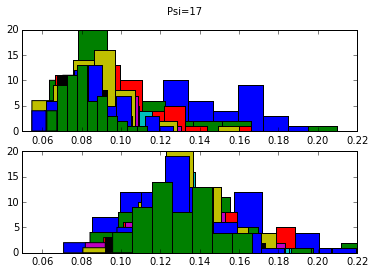

In [183]:
for i in xrange(1,18,2):
    plot_euclid(UNIF_SORT_PRIOR, UNIF_USORT_PRIOR, i, 41, 94, 1000)

In [129]:
df = pd.read_table(UNIF_USORT_PRIOR, nrows=10000)
cols = [df.columns[1]]
cols.append(df.columns[4])
cols.append(df.columns[41:94])
cols.append(df.columns[113:130])
data = df.as_matrix()
#a[np.where(a[:,0] == 9)]
d8 = data[np.where(data[:,1] == 18)[0]]
mean8 = np.mean(d8, axis=0)
dist = distance.euclidean(d8[3][41:94], mean8[41:94])
tot = 0
usldist = []
for i, _ in enumerate(d8):
    val = distance.euclidean(d8[i][41:94], mean8[41:94])
    usldist.append(val)
print(np.mean(usldist))
#print(usldist)

0.136510082796


In [130]:
df = pd.read_table(UNIF_SORT_PRIOR, nrows=10000)
cols = [df.columns[1]]
cols.append(df.columns[4])
cols.append(df.columns[41:94])
cols.append(df.columns[113:130])
data = df.as_matrix()
#a[np.where(a[:,0] == 9)]
d8 = data[np.where(data[:,1] == 18)[0]]
mean8 = np.mean(d8, axis=0)
dist = distance.euclidean(d8[3][41:94], mean8[41:94])
sldist = []
for i, _ in enumerate(d8):
    val = distance.euclidean(d8[i][41:94], mean8[41:94])
    sldist.append(val)
print(np.mean(sldist))
#print(sldist)

0.0834536394414


In [90]:
collections.Counter(data[:,1])

Counter({1.0: 61,
         2.0: 50,
         3.0: 51,
         4.0: 58,
         5.0: 62,
         6.0: 51,
         7.0: 57,
         8.0: 51,
         9.0: 47,
         10.0: 55,
         11.0: 57,
         12.0: 71,
         13.0: 55,
         14.0: 60,
         15.0: 61,
         16.0: 54,
         17.0: 57,
         18.0: 42})

(array([   1.,   18.,  120.,  186.,  133.,   53.,   20.,    7.,    1.,    3.]),
 array([ 0.04005547,  0.05134936,  0.06264325,  0.07393714,  0.08523103,
         0.09652492,  0.10781881,  0.11911271,  0.1304066 ,  0.14170049,
         0.15299438]),
 <a list of 10 Patch objects>)

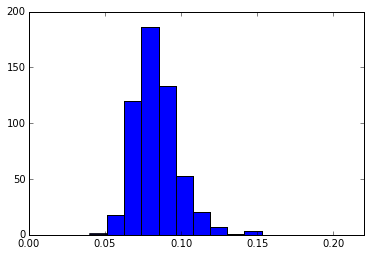

In [131]:
plt.xlim(xmin=0, xmax=0.22)
plt.hist(sldist)

(array([   5.,   91.,  187.,  163.,   64.,   18.,   10.,    2.,    0.,    2.]),
 array([ 0.08719468,  0.10321144,  0.1192282 ,  0.13524496,  0.15126172,
         0.16727848,  0.18329524,  0.199312  ,  0.21532876,  0.23134552,
         0.24736228]),
 <a list of 10 Patch objects>)

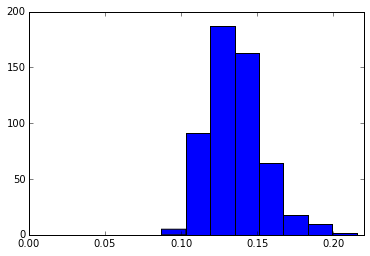

In [132]:
plt.xlim(xmin=0, xmax=0.22)
plt.hist(usldist)

In [133]:
print(np.std(sldist))
print(np.std(usldist))

0.0142371491103
0.0195153476065


0.0901112532405
0.140588118911


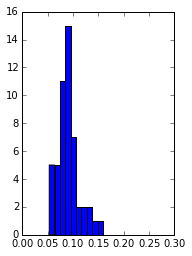

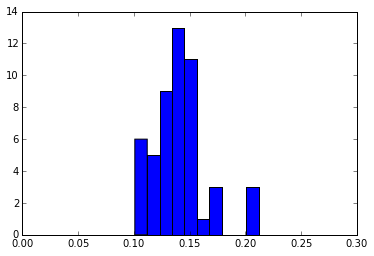

In [144]:
plot_euclid(UNIF_SORT_PRIOR, UNIF_USORT_PRIOR, 8, 41, 94, 1000)